In [4]:
from scipy.special import binom
from scipy.stats import binom as binom2
import matplotlib.pyplot as plt

p=0.005
max_error_rate=10**-4

In [5]:
#define some functions

def rate(m,r):
    return (sum([binom(m,i) for i in range(r+1)]))/2**m

def message_length(m, r):
    return sum([binom(m,i) for i in range(r+1)])
        
def highest_allowed_r(m,eps):
    rv=binom2(2**m,p)
    for r in range(m):
        #print(r, 1-binom2.cdf(2**(m-r-1)-1,2**m,p))
        if(1-rv.cdf(2**(m-r-1)-1)>eps):
            if r==0:
                print("impossible m")
            return r-1
        


    

In [6]:
for m in range(2,30):
    r=highest_allowed_r(m, max_error_rate)
    print(m, r, message_length(m,r), rate(m,r))

impossible m
2 -1 0 0
3 0 1.0 0.125
4 1 5.0 0.3125
5 2 16.0 0.5
6 2 22.0 0.34375
7 3 64.0 0.5
8 4 163.0 0.63671875
9 4 256.0 0.5
10 5 638.0 0.623046875
11 5 1024.0 0.5
12 5 1586.0 0.38720703125
13 5 2380.0 0.29052734375
14 6 6476.0 0.395263671875
15 6 9949.0 0.303619384765625
16 6 14893.0 0.2272491455078125
17 6 21778.0 0.1661529541015625
18 6 31180.0 0.1189422607421875
19 6 43796.0 0.08353424072265625
20 6 60460.0 0.057659149169921875
21 6 82160.0 0.03917694091796875
22 6 110056.0 0.026239395141601562
23 6 145499.0 0.01734483242034912
24 6 190051.0 0.011327922344207764
25 6 245506.0 0.007316648960113525
26 6 313912.0 0.0046776533126831055
27 6 397594.0 0.0029623061418533325
28 6 499178.0 0.0018595829606056213
29 6 621616.0 0.0011578500270843506


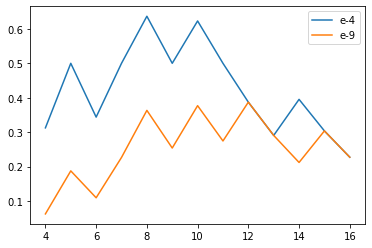

In [7]:
x=list(range(4,17))
y1=[]
y2=[]
for m in x:
    n=(2**m)
    y1+=[rate(m, highest_allowed_r(m,10**-4))]
    y2+=[rate(m, highest_allowed_r(m,10**-9))]
    

plt.plot(x,y1, label="e-4")
plt.plot(x,y2, label="e-9")
plt.legend()
plt.show()